In [1]:
from Utilities_modelingV2 import *
from Utilities_plotsV2 import *

# Excel spreadsheet and material name strings
excel_filename = 'Eurofer_example_Qihan.xlsx'

# Load excel data for desired property name
material_property = "Eurofer_strength"

# Load the data from the Excel file

# 3rd argument is header_rows_list, containing a minimum of 1 and a maximum of 2 row integers
# Denotes what rows to consider in constructing variable names -
# If two row integers are given, then the first row (e.g. material name) is used as a prefix,
# while the second row (e.g. indepedent or dependent variable) is used as a suffix.
# If two row integers are given, it is assume that the format is:
# |                  Material Name 1              |   ...   |                  Material Name n              |
# | Independent variable 1 | Dependent variable 1 |   ...   | Independent variable n | Dependent variable n |

# If only one row integers are given, it is assume that the format is:
# | Independent variable 1 | Dependent variable 1 |   ...   | Independent variable n | Dependent variable n |

# Row integers start counting from 1 like in an Excel spreadsheet.

# 4th argument is num_data_rows, which is how many rows contain data.

var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=20, room_temp=293)

,EUROFER97TempC,EUROFER97YieldStrengthMPa,EUROFER97SyTempC1,EUROFER97SyYieldStrengthMPa1,EUROFER97SuTempC2,EUROFER97SuUltimateTensileStrengthMPa,EUROFER979791h51TempC3,EUROFER979791h51TensileStrengthMPa,EUROFER97ODSSyTempC4,EUROFER97ODSSyYieldStrengthMPa2,EUROFER97ODSSuTempC5,EUROFER97ODSSuUltimateTensileStrengthMPa1
0,20,547.858099,20.0,511.72884,20.0,634.60653,293,682.894737,293,886.0,293,1066.0
1,50,525.368139,100.0,476.28520,100.0,593.93268,291.219554,552.631579,300,727.0,300,913.0
2,100,508.768407,150.0,461.81125,150.0,570.30981,391.185488,507.894737,400,741.0,400,840.0
3,150,494.846051,200.0,452.56896,200.0,551.91572,496.567876,426.315789,500,537.0,500,685.0
4,200,486.278447,250.0,445.93818,250.0,534.82883,595.809913,293.421053,600,330.0,600,428.0
5,250,479.317269,300.0,436.69732,300.0,515.12754,697.649463,159.210526,700,163.0,700,247.0
6,300,471.820616,350.0,427.45072,350.0,495.42626,NaN,NaN,NaN,NaN,NaN,NaN
7,350,462.717537,400.0,410.36382,400.0,466.57318,NaN,NaN,NaN,NaN,NaN,NaN
8,400,448.795181,450.0,388.04959,450.0,432.49275,NaN,NaN,NaN,NaN,NaN,NaN
9,450,427.376171,500.0,353.96629,500.0,389.26197,NaN,NaN,NaN,NaN,NaN,NaN


**Fitting parameters for F82H Yield Strength** 


[[Model]]
    Model(weibull)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 200
    # variables        = 2
    chi-square         = 32.6998347
    reduced chi-square = 0.16515068
    Akaike info crit   = -358.189469
    Bayesian info crit = -351.592834
    R-squared          = 0.28520284
[[Variables]]
    gamma:  1.52898800 +/- 0.10057455 (6.58%) (init = 1)
    alpha:  0.92655109 +/- 0.05568021 (6.01%) (init = 1)
    mu:     0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma, alpha) = -0.1891


**The equation for F82H Yield Strength is:**


1.71815*T**0.528988*exp(-1.12371539736838*T**1.52898800158289)

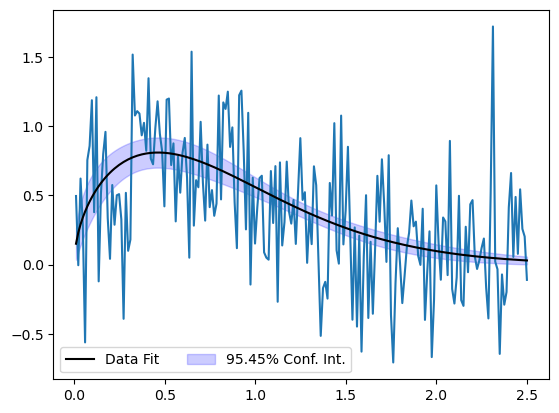

In [2]:
# WEIBULL FITTING FUNCTION TESTING

material_name = "F82H"
material_property = "Yield Strength"

# Font and marker sizes for plotting
fsize = 10 # font size
msize = 10 # marker size

gamma_test = 1.5
alpha_test = 1
mu_test = 0
test_pts = 200
weibull_x_test = np.linspace(0.01, 2.5, test_pts)
weibull_y_test = np.zeros(test_pts)

for i in range(0, test_pts):
    weibull_y_test[i] = weibull(weibull_x_test[i], gamma_test, alpha_test, mu_test)

weibull_y_test += 0.4*np.random.randn(test_pts)

plt.plot(weibull_x_test, weibull_y_test)

fit_result = get_model_fit_and_print_it(weibull_x_test, weibull_y_test, fit_func='weibull', method='leastsq',\
    fit_fun_args_and_initials={'gamma':1, 'alpha':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

plot_fit_and_conf(weibull_x_test, weibull_y_test, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

**Fitting parameters for F82H Yield Strength** 


[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 1588
    # data points      = 200
    # variables        = 4
    chi-square         = 4.07056338
    reduced chi-square = 0.02076818
    Akaike info crit   = -770.907191
    Bayesian info crit = -757.713921
    R-squared          = 0.98626615
[[Variables]]
    a:  42.6402009 +/- 170.085927 (398.89%) (init = 1)
    b: -40.5980119 +/- 170.017875 (418.78%) (init = 1)
    c:  13.6105789 +/- 30.9231090 (227.20%) (init = 1)
    d:  0.29525397 +/- 0.46234335 (156.59%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -1.0000
    C(a, c) = +1.0000
    C(b, c) = -1.0000
    C(b, d) = +0.9997
    C(a, d) = -0.9997
    C(c, d) = -0.9995


**The equation for F82H Yield Strength is:**


(13.6106*T - 40.598)*exp(0.295253967802767*T) + 42.6402

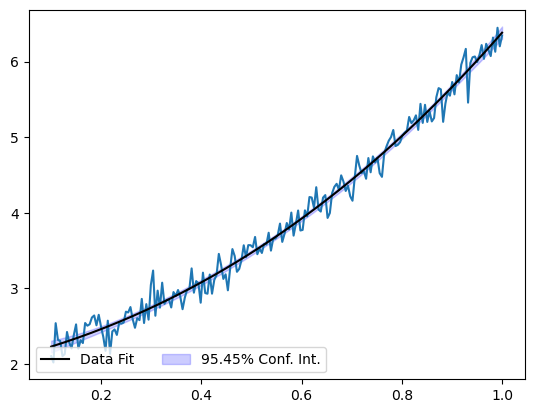

In [3]:
# EXPONENTIAL FITTING FUNCTION TESTING

a_test = 1
b_test = 1
c_test = 1
d_test = 1
test_pts = 200
exponential_x_test = np.linspace(0.1, 1, test_pts)
exponential_y_test = np.zeros(test_pts)

for i in range(0, test_pts):
    exponential_y_test[i] = exponential(exponential_x_test[i], a_test, b_test, c_test, d_test)

exponential_y_test += 0.15*np.random.randn(test_pts)

plt.plot(exponential_x_test, exponential_y_test)

fit_result = get_model_fit_and_print_it(exponential_x_test, exponential_y_test, fit_func='exponential', method='least_squares',\
    fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

plot_fit_and_conf(exponential_x_test, exponential_y_test, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

**Fitting parameters for F82H Yield Strength** 


[[Model]]
    Model(transition)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 200
    # variables        = 5
    chi-square         = 64.0930580
    reduced chi-square = 0.32868235
    Akaike info crit   = -217.596262
    Bayesian info crit = -201.104675
    R-squared          = 0.89314631
[[Variables]]
    a:  0.97500580 +/- 0.05545365 (5.69%) (init = 1)
    b:  0.42985723 +/- 0.51602474 (120.05%) (init = 1)
    c:  1.13655156 +/- 0.12709075 (11.18%) (init = 1)
    d:  1.08119851 +/- 0.46681979 (43.18%) (init = 1)
    e:  0.78781103 +/- 0.55873232 (70.92%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -0.9842
    C(b, d) = +0.7263
    C(c, d) = -0.7176
    C(b, e) = +0.6123
    C(c, e) = -0.5532
    C(a, c) = +0.1429
    C(a, d) = -0.1372
    C(a, b) = -0.1337


**The equation for F82H Yield Strength is:**


(0.568276*T - 0.272574)*(tanh(1.26933992849773*T - 1.37240843497159) + 1.0) + 0.975006

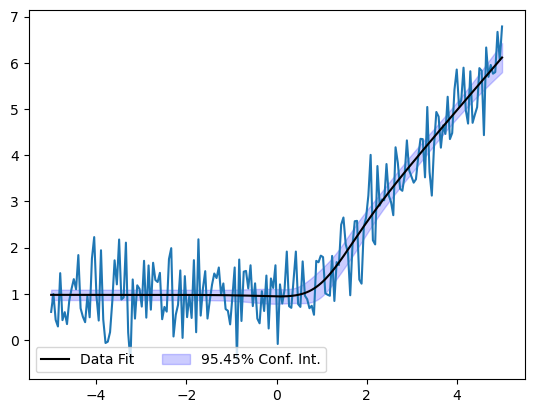

In [4]:
# TRANSITION FITTING FUNCTION TESTING

a_test = 1
b_test = 1
c_test = 1
d_test = 1
e_test = 1
test_pts = 200
transition_x_test = np.linspace(-5, 5, test_pts)
transition_y_test = np.zeros(test_pts)

for i in range(0, test_pts):
    transition_y_test[i] = transition(transition_x_test[i], a_test, b_test, c_test, d_test, e_test)

transition_y_test += 0.6*np.random.randn(test_pts)

plt.plot(transition_x_test, transition_y_test)

fit_result = get_model_fit_and_print_it(transition_x_test, transition_y_test, fit_func='transition', method='leastsq',\
    fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1, 'e':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

plot_fit_and_conf(transition_x_test, transition_y_test, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')